Tâche 6 : symmetry.ipynb

Loudeche Maxime.

Ce notebook permet de télécharger le fichier .CIF du matériaux "mp-1023936" : WSe2. Il permet également de mettre en évidence l’effet de 3 éléments de symétrie différents (pas l’identité) chacun pour 1 atome différent. Nous travaillerons ici avec la maille conventionnelle étant donné que cette dernière fait apparaître toute la symétrie de la maille :
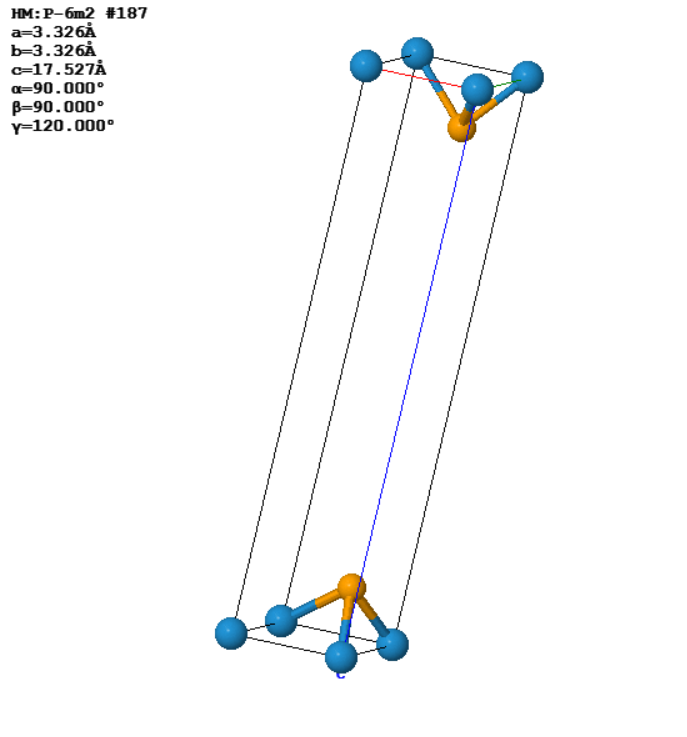
Légende : Orange = Se ; Bleu = W

<hr width="100%" color="black" align=center>

<b>Opération de symétrie 1 : Réflexion par rapport à un plan miroir.</b>

Intéressons nous au plan miroir qui envoie un point (x, y, z) à la position (x, y, -z). 

In [7]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.operations import SymmOp
with MPRester("1UZlSnaTONTXfpKB") as m:
    structure = m.get_structure_by_material_id("mp-1023936")
    
mir = SymmOp.from_xyz_string('x, y, -z')
print('La matrice associée à ce plan miroir est : ')
print(mir.rotation_matrix)

La matrice associée à ce plan miroir est : 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]


L'application de ce plan miroir à un atome de Se situé en (0.33, 0.67, 0.1) donne :

In [8]:
print(mir.operate((0.33, 0.67, 0.1)))

[ 0.33  0.67 -0.1 ]


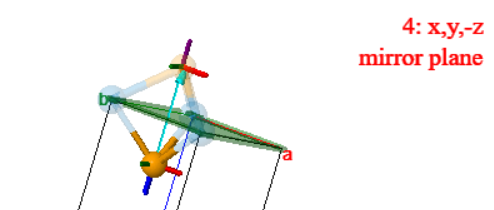
La flèche bleue représente l'application du plan miroir (en vert).

<hr width="100%" align=center>

<b>Opération de symétrie 2 : Rotation d'ordre 3 dans la direction [001].</b>

Intéressons nous à la rotation d'ordre 3 (120 degré ou 2pi/3 d'angle de rotation) qui envoie un point (x, y, z) à la position (-y, x-y, z).

In [11]:
rot = SymmOp.from_xyz_string('-y, x-y, z')
print('La matrice associée à cette rotation est : ')
print(rot.rotation_matrix)

La matrice associée à cette rotation est : 
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]


L'application de cette rotation à un atome de W situé en (0, 1, 1) donne :

In [12]:
print(rot.operate((0, 1, 1)))

[-1. -1.  1.]


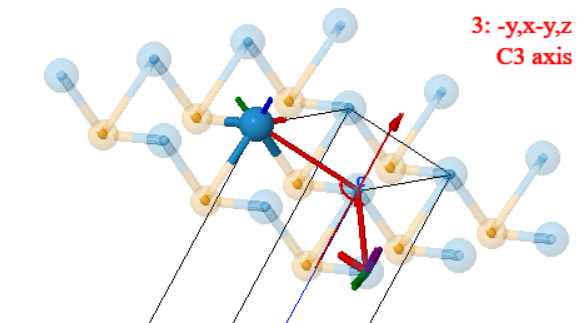
La flèche rouge représente l'axe de la rotation d'ordre 3 (direction [001]). 

<hr width="100%" color="black" align=center>

<b>Opération de symétrie 3 : Roto-inversion d'ordre 6 avec (0, 0, 0) comme point d'inversion.</b>

Intéressons nous à la roto-inversion d'ordre 6 (une inversion selon (0, 0, 0) suivi d'une rotation de 60 degré ou 2pi/6 d'angle de rotation, ou inversément : la rotation suivie de l'inversion) qui envoie un point (x, y, z) à la position ().

In [13]:
rot_inv = SymmOp.from_xyz_string('-x+y, -x, -z')
print('La matrice associée à cette roto-inversion est : ')
print(rot_inv.rotation_matrix)

La matrice associée à cette roto-inversion est : 
[[-1.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0. -1.]]


L'application de cette roto-inversion sur un atome de W situé en (0, 1, 0) donne :

In [14]:
print(rot_inv.operate((0, 1, 0)))

[1. 0. 0.]


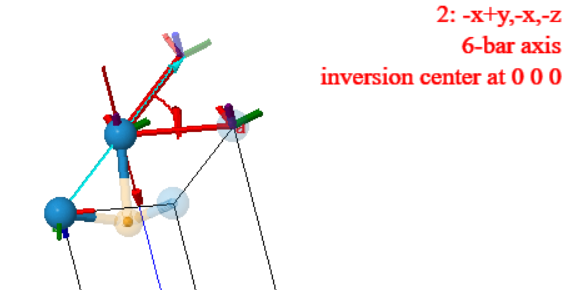

La fléche bleue représente l'inversion et la fléche rouge (courbée) indique la rotation. Au milieu de la flèche, il n'est pas visible sur la photo mais il y a un point jaune qui représente le centre d'inversion (en (0, 0, 0)). 